In [185]:
import requests, zipfile
import pandas as pd
import io
import os
import numpy as np 
import tensorflow as tf
from matplotlib import pyplot as plt
from io import StringIO
np.set_printoptions(threshold=sys.maxsize)

In [186]:
#define variables
url = 'https://data.binance.vision/data/spot/monthly/klines/BNBBUSD/12h/BNBBUSD-12h-2022-'
zip = '.zip'
x = np.array([], dtype=np.uint32)
y = np.array([], dtype=np.uint32)

In [187]:
#download and charge data into a data.frame trough months

for i in range(1, 12):
        num = '0'+str(i) if i < 10 else str(i)
        patho = url+num+zip
        #download all months in a year
        #patho = os.path.normpath(patho)
        #r = requests.get(patho, stream=True)
        #print(r.status_code)
        #z = zipfile.ZipFile(io.BytesIO(r.content))
        #z.extractall(os.path.join(os.getcwd(), 'data'))
        pathi = 'BNBBUSD-12h-2022-'+num+'.csv'
        df  =    pd.read_csv(os.path.join(os.getcwd(), 'data', pathi)
        , header = None
        , names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'ignore'])
        x_time = df[['Open time']].to_numpy()
        x = np.append(x, x_time)
        y_price_high = df[['High']].to_numpy(dtype = np.uint32)
        y_price_close = df[['Low']].to_numpy(dtype = np.uint32)
        y_promedio = np.add(y_price_high, y_price_close)
        y_promedio =  y_promedio/2
        y = np.append(y, y_promedio)

In [188]:
#special mark for cast date


In [189]:
def prepare_y_series(np_array, series_size = 8):
    x_series = []
    y_series = []
    for y_val in range(len(np_array)-series_size):
        x_series.append([[a] for a in np_array[y_val:y_val+series_size]])
        y_series.append(np_array[y_val+series_size])
        #print(np_array[y_val+series_size])
    #print(np.array(y_series))
    return np.array(x_series), np.array(y_series)

x_series_def, y_series_def = prepare_y_series(y)
print(x_series_def.shape)

(660, 8, 1)


In [190]:
#train 90% data and test 10% restant data
nint_perc = int(len(x_series_def)*.90)
nintfive_perc = int(len(x_series_def)*.95)
hun_perc = int(len(x_series_def)*1.0)
'''
print('90% = '+str(nint_perc))
print('95% = '+str(nintfive_perc))
print('100% = '+str(hun_perc))
'''
x_train, y_train = x_series_def[:nint_perc], y_series_def[:nint_perc]
x_valid, y_valid = x_series_def[nint_perc:nintfive_perc], y_series_def[nint_perc:nintfive_perc]
x_test, y_test = x_series_def[nintfive_perc:hun_perc], y_series_def[nintfive_perc:hun_perc]
x_plt_train = x[:nint_perc]
x_plt_valid = x[nint_perc:nintfive_perc]
x_plt_test = x[nintfive_perc:hun_perc]

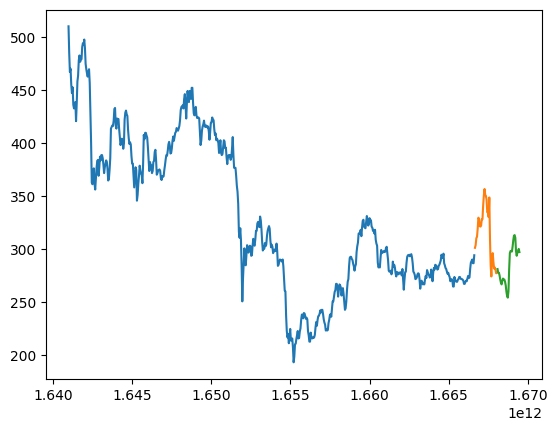

In [193]:
plt.plot(x_plt_train,y_train)
plt.plot(x_plt_valid,y_valid)
plt.plot(x_plt_test,y_test)
plt.show()

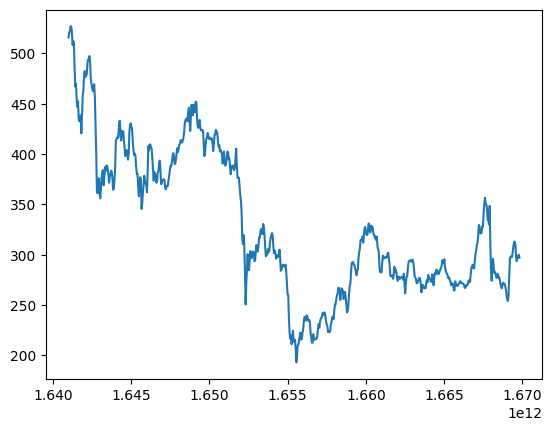

In [192]:
#plot
plt.plot(x,y)
plt.show()

In [169]:
#new maderfucking model
mamfmodel = tf.keras.models.Sequential()
mamfmodel.add(tf.keras.layers.InputLayer((8, 1)))
mamfmodel.add(tf.keras.layers.LSTM(units = 64))
mamfmodel.add(tf.keras.layers.Dense(8, 'relu'))
mamfmodel.add(tf.keras.layers.Dense(1, 'linear'))

mamfmodel.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 64)                16896     
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [194]:
cp = tf.keras.callbacks.ModelCheckpoint('mamfmodel/', save_best_only=True)
mamfmodel.compile(loss='mean_squared_error', optimizer='adam',metrics= tf.keras.metrics.RootMeanSquaredError())

#mamfmodel.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=150, callbacks=[cp])

Epoch 1/150
 1/19 [>.............................] - ETA: 24s - loss: 66312.8125 - root_mean_squared_error: 257.5128

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 5s 173ms/step - loss: 60955.2812 - root_mean_squared_error: 246.8912 - val_loss: 48237.0117 - val_root_mean_squared_error: 219.6293
Epoch 2/150
19/19 [==============================] - ETA: 0s - loss: 58579.8125 - root_mean_squared_error: 242.0327

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 147ms/step - loss: 58579.8125 - root_mean_squared_error: 242.0327 - val_loss: 45994.9141 - val_root_mean_squared_error: 214.4642
Epoch 3/150
17/19 [=========================>....] - ETA: 0s - loss: 56791.0352 - root_mean_squared_error: 238.3087

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 145ms/step - loss: 56182.0469 - root_mean_squared_error: 237.0275 - val_loss: 43778.7578 - val_root_mean_squared_error: 209.2337
Epoch 4/150
18/19 [===========================>..] - ETA: 0s - loss: 53954.8281 - root_mean_squared_error: 232.2818

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 172ms/step - loss: 53795.1797 - root_mean_squared_error: 231.9379 - val_loss: 41571.6406 - val_root_mean_squared_error: 203.8913
Epoch 5/150
13/19 [===================>..........] - ETA: 0s - loss: 51379.3906 - root_mean_squared_error: 226.6702

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 147ms/step - loss: 51430.7461 - root_mean_squared_error: 226.7835 - val_loss: 39368.1250 - val_root_mean_squared_error: 198.4140
Epoch 6/150
19/19 [==============================] - ETA: 0s - loss: 49060.6562 - root_mean_squared_error: 221.4964

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 148ms/step - loss: 49060.6562 - root_mean_squared_error: 221.4964 - val_loss: 37208.3242 - val_root_mean_squared_error: 192.8946
Epoch 7/150
16/19 [========================>.....] - ETA: 0s - loss: 46304.7305 - root_mean_squared_error: 215.1853

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 145ms/step - loss: 46745.9883 - root_mean_squared_error: 216.2082 - val_loss: 35048.2305 - val_root_mean_squared_error: 187.2117
Epoch 8/150
19/19 [==============================] - ETA: 0s - loss: 44437.0977 - root_mean_squared_error: 210.8011

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 176ms/step - loss: 44437.0977 - root_mean_squared_error: 210.8011 - val_loss: 32937.2891 - val_root_mean_squared_error: 181.4863
Epoch 9/150
19/19 [==============================] - ETA: 0s - loss: 42170.7930 - root_mean_squared_error: 205.3553

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 148ms/step - loss: 42170.7930 - root_mean_squared_error: 205.3553 - val_loss: 30872.4316 - val_root_mean_squared_error: 175.7055
Epoch 10/150
16/19 [========================>.....] - ETA: 0s - loss: 40399.6836 - root_mean_squared_error: 200.9967

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 145ms/step - loss: 39944.9062 - root_mean_squared_error: 199.8622 - val_loss: 28858.1758 - val_root_mean_squared_error: 169.8769
Epoch 11/150
19/19 [==============================] - ETA: 0s - loss: 37777.4766 - root_mean_squared_error: 194.3643

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 171ms/step - loss: 37777.4766 - root_mean_squared_error: 194.3643 - val_loss: 26886.0840 - val_root_mean_squared_error: 163.9698
Epoch 12/150
19/19 [==============================] - ETA: 0s - loss: 35649.8945 - root_mean_squared_error: 188.8118

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 146ms/step - loss: 35649.8945 - root_mean_squared_error: 188.8118 - val_loss: 24973.1953 - val_root_mean_squared_error: 158.0291
Epoch 13/150
19/19 [==============================] - ETA: 0s - loss: 33582.1211 - root_mean_squared_error: 183.2543

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 147ms/step - loss: 33582.1211 - root_mean_squared_error: 183.2543 - val_loss: 23136.0098 - val_root_mean_squared_error: 152.1053
Epoch 14/150
19/19 [==============================] - ETA: 0s - loss: 31588.2930 - root_mean_squared_error: 177.7310

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 149ms/step - loss: 31588.2930 - root_mean_squared_error: 177.7310 - val_loss: 21358.1953 - val_root_mean_squared_error: 146.1444
Epoch 15/150
19/19 [==============================] - ETA: 0s - loss: 29657.5293 - root_mean_squared_error: 172.2136

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 179ms/step - loss: 29657.5293 - root_mean_squared_error: 172.2136 - val_loss: 19640.7383 - val_root_mean_squared_error: 140.1454
Epoch 16/150
19/19 [==============================] - ETA: 0s - loss: 27798.6035 - root_mean_squared_error: 166.7291

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 144ms/step - loss: 27798.6035 - root_mean_squared_error: 166.7291 - val_loss: 18007.6816 - val_root_mean_squared_error: 134.1927
Epoch 17/150
19/19 [==============================] - ETA: 0s - loss: 26015.6016 - root_mean_squared_error: 161.2935

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 147ms/step - loss: 26015.6016 - root_mean_squared_error: 161.2935 - val_loss: 16447.5371 - val_root_mean_squared_error: 128.2480
Epoch 18/150
19/19 [==============================] - ETA: 0s - loss: 24308.2949 - root_mean_squared_error: 155.9112

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 170ms/step - loss: 24308.2949 - root_mean_squared_error: 155.9112 - val_loss: 14971.5371 - val_root_mean_squared_error: 122.3582
Epoch 19/150
 1/19 [>.............................] - ETA: 0s - loss: 23657.6270 - root_mean_squared_error: 153.8104

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 146ms/step - loss: 22688.4180 - root_mean_squared_error: 150.6268 - val_loss: 13573.1221 - val_root_mean_squared_error: 116.5037
Epoch 20/150
16/19 [========================>.....] - ETA: 0s - loss: 20940.7695 - root_mean_squared_error: 144.7093

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 147ms/step - loss: 21134.7246 - root_mean_squared_error: 145.3779 - val_loss: 12260.1055 - val_root_mean_squared_error: 110.7254
Epoch 21/150
19/19 [==============================] - ETA: 0s - loss: 19681.2168 - root_mean_squared_error: 140.2898

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 173ms/step - loss: 19681.2168 - root_mean_squared_error: 140.2898 - val_loss: 11015.6406 - val_root_mean_squared_error: 104.9554
Epoch 22/150
16/19 [========================>.....] - ETA: 0s - loss: 17921.5020 - root_mean_squared_error: 133.8712

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 147ms/step - loss: 18292.0352 - root_mean_squared_error: 135.2480 - val_loss: 9875.4531 - val_root_mean_squared_error: 99.3753
Epoch 23/150
 1/19 [>.............................] - ETA: 0s - loss: 13773.9785 - root_mean_squared_error: 117.3626

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 148ms/step - loss: 17015.4570 - root_mean_squared_error: 130.4433 - val_loss: 8788.7568 - val_root_mean_squared_error: 93.7484
Epoch 24/150
 1/19 [>.............................] - ETA: 0s - loss: 12831.9121 - root_mean_squared_error: 113.2780

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 145ms/step - loss: 15793.7510 - root_mean_squared_error: 125.6732 - val_loss: 7807.6929 - val_root_mean_squared_error: 88.3612
Epoch 25/150
16/19 [========================>.....] - ETA: 0s - loss: 14474.5762 - root_mean_squared_error: 120.3103

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 177ms/step - loss: 14678.1465 - root_mean_squared_error: 121.1534 - val_loss: 6906.7480 - val_root_mean_squared_error: 83.1068
Epoch 26/150
18/19 [===========================>..] - ETA: 0s - loss: 13595.5039 - root_mean_squared_error: 116.5998

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 148ms/step - loss: 13644.2607 - root_mean_squared_error: 116.8086 - val_loss: 6083.0713 - val_root_mean_squared_error: 77.9940
Epoch 27/150
19/19 [==============================] - ETA: 0s - loss: 12698.0293 - root_mean_squared_error: 112.6855

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 145ms/step - loss: 12698.0293 - root_mean_squared_error: 112.6855 - val_loss: 5323.2959 - val_root_mean_squared_error: 72.9609
Epoch 28/150
18/19 [===========================>..] - ETA: 0s - loss: 11719.5127 - root_mean_squared_error: 108.2567

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 172ms/step - loss: 11811.6768 - root_mean_squared_error: 108.6815 - val_loss: 4666.7720 - val_root_mean_squared_error: 68.3138
Epoch 29/150
19/19 [==============================] - ETA: 0s - loss: 11024.8525 - root_mean_squared_error: 104.9993

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 146ms/step - loss: 11024.8525 - root_mean_squared_error: 104.9993 - val_loss: 4053.7898 - val_root_mean_squared_error: 63.6694
Epoch 30/150
18/19 [===========================>..] - ETA: 0s - loss: 10359.8477 - root_mean_squared_error: 101.7833

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 148ms/step - loss: 10298.7480 - root_mean_squared_error: 101.4827 - val_loss: 3513.7339 - val_root_mean_squared_error: 59.2768
Epoch 31/150
19/19 [==============================] - ETA: 0s - loss: 9657.6650 - root_mean_squared_error: 98.2734  

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 170ms/step - loss: 9657.6650 - root_mean_squared_error: 98.2734 - val_loss: 3023.7480 - val_root_mean_squared_error: 54.9886
Epoch 32/150
13/19 [===================>..........] - ETA: 0s - loss: 9329.3760 - root_mean_squared_error: 96.5887

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 149ms/step - loss: 9063.5811 - root_mean_squared_error: 95.2028 - val_loss: 2609.1836 - val_root_mean_squared_error: 51.0802
Epoch 33/150
18/19 [===========================>..] - ETA: 0s - loss: 8492.7607 - root_mean_squared_error: 92.1562

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 146ms/step - loss: 8537.7188 - root_mean_squared_error: 92.3998 - val_loss: 2253.0886 - val_root_mean_squared_error: 47.4667
Epoch 34/150
19/19 [==============================] - ETA: 0s - loss: 8070.3442 - root_mean_squared_error: 89.8351  

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 149ms/step - loss: 8070.3442 - root_mean_squared_error: 89.8351 - val_loss: 1943.5006 - val_root_mean_squared_error: 44.0852
Epoch 35/150
19/19 [==============================] - ETA: 0s - loss: 7782.8442 - root_mean_squared_error: 88.2204

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 174ms/step - loss: 7782.8442 - root_mean_squared_error: 88.2204 - val_loss: 1667.9181 - val_root_mean_squared_error: 40.8402
Epoch 36/150
19/19 [==============================] - ETA: 0s - loss: 7286.1172 - root_mean_squared_error: 85.3588

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 148ms/step - loss: 7286.1172 - root_mean_squared_error: 85.3588 - val_loss: 1448.4861 - val_root_mean_squared_error: 38.0590
Epoch 37/150
19/19 [==============================] - ETA: 0s - loss: 6966.0791 - root_mean_squared_error: 83.4630

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 145ms/step - loss: 6966.0791 - root_mean_squared_error: 83.4630 - val_loss: 1258.8485 - val_root_mean_squared_error: 35.4803
Epoch 38/150
19/19 [==============================] - ETA: 0s - loss: 6666.8286 - root_mean_squared_error: 81.6507

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 173ms/step - loss: 6666.8286 - root_mean_squared_error: 81.6507 - val_loss: 1162.4763 - val_root_mean_squared_error: 34.0951
Epoch 39/150
17/19 [=========================>....] - ETA: 0s - loss: 6298.4712 - root_mean_squared_error: 79.3629

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 149ms/step - loss: 6361.5010 - root_mean_squared_error: 79.7590 - val_loss: 1026.7483 - val_root_mean_squared_error: 32.0429
Epoch 40/150
19/19 [==============================] - 0s 5ms/step - loss: 6021.3506 - root_mean_squared_error: 77.5974 - val_loss: 1056.5249 - val_root_mean_squared_error: 32.5042
Epoch 41/150
18/19 [===========================>..] - ETA: 0s - loss: 5727.8374 - root_mean_squared_error: 75.6825

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 145ms/step - loss: 5667.0127 - root_mean_squared_error: 75.2796 - val_loss: 978.7336 - val_root_mean_squared_error: 31.2847
Epoch 42/150
19/19 [==============================] - ETA: 0s - loss: 5230.7554 - root_mean_squared_error: 72.3240

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 148ms/step - loss: 5230.7554 - root_mean_squared_error: 72.3240 - val_loss: 759.4492 - val_root_mean_squared_error: 27.5581
Epoch 43/150
17/19 [=========================>....] - ETA: 0s - loss: 5046.1787 - root_mean_squared_error: 71.0365

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 175ms/step - loss: 4831.2358 - root_mean_squared_error: 69.5071 - val_loss: 653.0762 - val_root_mean_squared_error: 25.5554
Epoch 44/150
19/19 [==============================] - ETA: 0s - loss: 4451.6816 - root_mean_squared_error: 66.7209

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 147ms/step - loss: 4451.6816 - root_mean_squared_error: 66.7209 - val_loss: 557.4839 - val_root_mean_squared_error: 23.6111
Epoch 45/150
19/19 [==============================] - ETA: 0s - loss: 4100.0645 - root_mean_squared_error: 64.0317

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 146ms/step - loss: 4100.0645 - root_mean_squared_error: 64.0317 - val_loss: 440.3831 - val_root_mean_squared_error: 20.9853
Epoch 46/150
19/19 [==============================] - ETA: 0s - loss: 3789.5947 - root_mean_squared_error: 61.5597

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 172ms/step - loss: 3789.5947 - root_mean_squared_error: 61.5597 - val_loss: 380.3942 - val_root_mean_squared_error: 19.5037
Epoch 47/150
 1/19 [>.............................] - ETA: 0s - loss: 3284.4756 - root_mean_squared_error: 57.3103

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 145ms/step - loss: 3496.3967 - root_mean_squared_error: 59.1303 - val_loss: 347.1243 - val_root_mean_squared_error: 18.6313
Epoch 48/150
19/19 [==============================] - ETA: 0s - loss: 3227.6057 - root_mean_squared_error: 56.8120

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 148ms/step - loss: 3227.6057 - root_mean_squared_error: 56.8120 - val_loss: 254.6545 - val_root_mean_squared_error: 15.9579
Epoch 49/150
18/19 [===========================>..] - ETA: 0s - loss: 2998.9148 - root_mean_squared_error: 54.7623

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 145ms/step - loss: 2963.7158 - root_mean_squared_error: 54.4400 - val_loss: 219.5649 - val_root_mean_squared_error: 14.8177
Epoch 50/150
19/19 [==============================] - ETA: 0s - loss: 2702.7324 - root_mean_squared_error: 51.9878

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 181ms/step - loss: 2702.7324 - root_mean_squared_error: 51.9878 - val_loss: 191.7025 - val_root_mean_squared_error: 13.8457
Epoch 51/150
18/19 [===========================>..] - ETA: 0s - loss: 2480.4622 - root_mean_squared_error: 49.8042

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 152ms/step - loss: 2466.1838 - root_mean_squared_error: 49.6607 - val_loss: 178.7575 - val_root_mean_squared_error: 13.3700
Epoch 52/150
19/19 [==============================] - ETA: 0s - loss: 2266.5059 - root_mean_squared_error: 47.6078

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 148ms/step - loss: 2266.5059 - root_mean_squared_error: 47.6078 - val_loss: 153.5047 - val_root_mean_squared_error: 12.3897
Epoch 53/150
19/19 [==============================] - 0s 4ms/step - loss: 2072.4353 - root_mean_squared_error: 45.5240 - val_loss: 154.6658 - val_root_mean_squared_error: 12.4365
Epoch 54/150
19/19 [==============================] - ETA: 0s - loss: 1903.6855 - root_mean_squared_error: 43.6312

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 173ms/step - loss: 1903.6855 - root_mean_squared_error: 43.6312 - val_loss: 144.6475 - val_root_mean_squared_error: 12.0269
Epoch 55/150
19/19 [==============================] - 0s 5ms/step - loss: 1739.3241 - root_mean_squared_error: 41.7052 - val_loss: 161.8347 - val_root_mean_squared_error: 12.7214
Epoch 56/150
19/19 [==============================] - 0s 5ms/step - loss: 1573.6501 - root_mean_squared_error: 39.6693 - val_loss: 160.3006 - val_root_mean_squared_error: 12.6610
Epoch 57/150
19/19 [==============================] - 0s 4ms/step - loss: 1426.5583 - root_mean_squared_error: 37.7698 - val_loss: 180.2654 - val_root_mean_squared_error: 13.4263
Epoch 58/150
19/19 [==============================] - 0s 4ms/step - loss: 1302.4617 - root_mean_squared_error: 36.0896 - val_loss: 154.2633 - val_root_mean_squared_error: 12.4203
Epoch 59/150
19/19 [==============================] - 0s 4ms/step - loss: 1195.6425 - root_mean_squared_error: 34.57

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 145ms/step - loss: 660.2959 - root_mean_squared_error: 25.6962 - val_loss: 142.9021 - val_root_mean_squared_error: 11.9542
Epoch 68/150
19/19 [==============================] - 0s 4ms/step - loss: 627.1045 - root_mean_squared_error: 25.0421 - val_loss: 156.0237 - val_root_mean_squared_error: 12.4909
Epoch 69/150
19/19 [==============================] - 0s 4ms/step - loss: 589.1898 - root_mean_squared_error: 24.2732 - val_loss: 241.2168 - val_root_mean_squared_error: 15.5312
Epoch 70/150
19/19 [==============================] - 0s 4ms/step - loss: 557.4705 - root_mean_squared_error: 23.6108 - val_loss: 151.3668 - val_root_mean_squared_error: 12.3031
Epoch 71/150
19/19 [==============================] - 0s 4ms/step - loss: 524.7136 - root_mean_squared_error: 22.9066 - val_loss: 167.7890 - val_root_mean_squared_error: 12.9533
Epoch 72/150
19/19 [==============================] - 0s 4ms/step - loss: 504.5937 - root_mean_squared_error: 22.4632 - v

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 148ms/step - loss: 459.3642 - root_mean_squared_error: 21.4328 - val_loss: 142.3521 - val_root_mean_squared_error: 11.9311
Epoch 75/150
19/19 [==============================] - 0s 4ms/step - loss: 439.4563 - root_mean_squared_error: 20.9632 - val_loss: 156.0073 - val_root_mean_squared_error: 12.4903
Epoch 76/150
17/19 [=========================>....] - ETA: 0s - loss: 407.4936 - root_mean_squared_error: 20.1865

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 170ms/step - loss: 412.5919 - root_mean_squared_error: 20.3124 - val_loss: 138.6549 - val_root_mean_squared_error: 11.7752
Epoch 77/150
19/19 [==============================] - 0s 4ms/step - loss: 394.2955 - root_mean_squared_error: 19.8569 - val_loss: 138.9794 - val_root_mean_squared_error: 11.7890
Epoch 78/150
19/19 [==============================] - 0s 5ms/step - loss: 384.4568 - root_mean_squared_error: 19.6076 - val_loss: 140.4290 - val_root_mean_squared_error: 11.8503
Epoch 79/150
14/19 [=====================>........] - ETA: 0s - loss: 408.7028 - root_mean_squared_error: 20.2164

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 148ms/step - loss: 360.0101 - root_mean_squared_error: 18.9739 - val_loss: 121.8954 - val_root_mean_squared_error: 11.0406
Epoch 80/150
19/19 [==============================] - 0s 4ms/step - loss: 348.5275 - root_mean_squared_error: 18.6689 - val_loss: 170.5750 - val_root_mean_squared_error: 13.0604
Epoch 81/150
19/19 [==============================] - 0s 5ms/step - loss: 338.4775 - root_mean_squared_error: 18.3978 - val_loss: 133.8250 - val_root_mean_squared_error: 11.5683
Epoch 82/150
19/19 [==============================] - 0s 4ms/step - loss: 320.5846 - root_mean_squared_error: 17.9049 - val_loss: 132.9563 - val_root_mean_squared_error: 11.5307
Epoch 83/150
19/19 [==============================] - 0s 5ms/step - loss: 309.8516 - root_mean_squared_error: 17.6026 - val_loss: 141.7254 - val_root_mean_squared_error: 11.9048
Epoch 84/150
19/19 [==============================] - 0s 4ms/step - loss: 299.0752 - root_mean_squared_error: 17.2938 - v

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 147ms/step - loss: 275.0825 - root_mean_squared_error: 16.5856 - val_loss: 121.5029 - val_root_mean_squared_error: 11.0228
Epoch 88/150
19/19 [==============================] - 0s 5ms/step - loss: 256.3888 - root_mean_squared_error: 16.0121 - val_loss: 128.9084 - val_root_mean_squared_error: 11.3538
Epoch 89/150
19/19 [==============================] - 0s 4ms/step - loss: 249.1041 - root_mean_squared_error: 15.7830 - val_loss: 126.8251 - val_root_mean_squared_error: 11.2617
Epoch 90/150
19/19 [==============================] - 0s 4ms/step - loss: 248.1584 - root_mean_squared_error: 15.7530 - val_loss: 129.7966 - val_root_mean_squared_error: 11.3928
Epoch 91/150
19/19 [==============================] - 0s 4ms/step - loss: 232.7220 - root_mean_squared_error: 15.2552 - val_loss: 129.3535 - val_root_mean_squared_error: 11.3734
Epoch 92/150
19/19 [==============================] - 0s 4ms/step - loss: 227.7038 - root_mean_squared_error: 15.0899 - v

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


19/19 [==============================] - 3s 170ms/step - loss: 158.1242 - root_mean_squared_error: 12.5747 - val_loss: 117.7575 - val_root_mean_squared_error: 10.8516
Epoch 106/150
19/19 [==============================] - 0s 5ms/step - loss: 157.3757 - root_mean_squared_error: 12.5449 - val_loss: 136.6758 - val_root_mean_squared_error: 11.6908
Epoch 107/150
19/19 [==============================] - 0s 5ms/step - loss: 155.4057 - root_mean_squared_error: 12.4662 - val_loss: 121.7197 - val_root_mean_squared_error: 11.0327
Epoch 108/150
19/19 [==============================] - 0s 5ms/step - loss: 149.0498 - root_mean_squared_error: 12.2086 - val_loss: 127.8962 - val_root_mean_squared_error: 11.3091
Epoch 109/150
19/19 [==============================] - 0s 5ms/step - loss: 158.8885 - root_mean_squared_error: 12.6051 - val_loss: 158.9686 - val_root_mean_squared_error: 12.6083
Epoch 110/150
19/19 [==============================] - 0s 5ms/step - loss: 145.9034 - root_mean_squared_error: 12.079

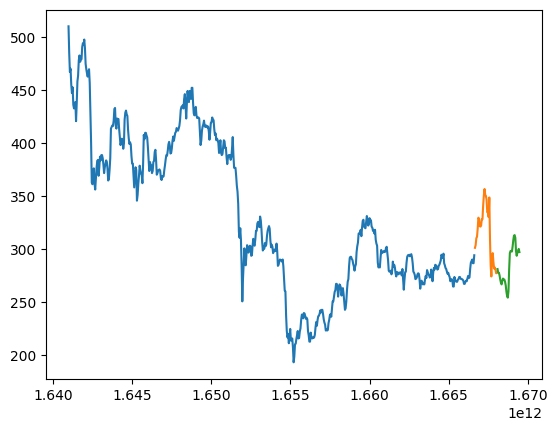

In [195]:
plt.plot(x_plt_train,y_train)
plt.plot(x_plt_valid,y_valid)
plt.plot(x_plt_test,y_test)
plt.show()

2/2 [==============================] - 0s 3ms/step


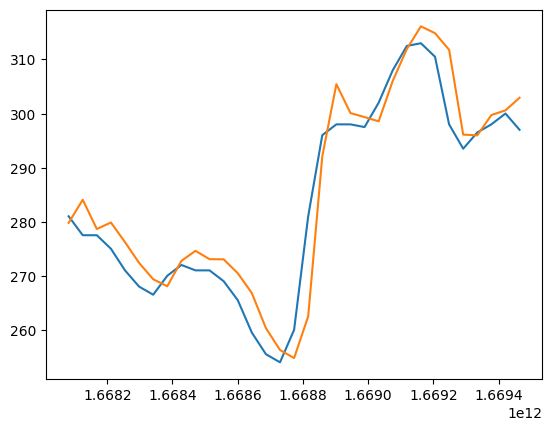

In [197]:
#print(x_test.shape)
y_pred = mamfmodel.predict(x_test)
#print(y_pred)
#print(x_plt_test)
plt.plot(x_plt_test,y_test)
plt.plot(x_plt_test,y_pred)
plt.show()


21/21 [==============================] - 0s 1ms/step
(660,) (660, 1)


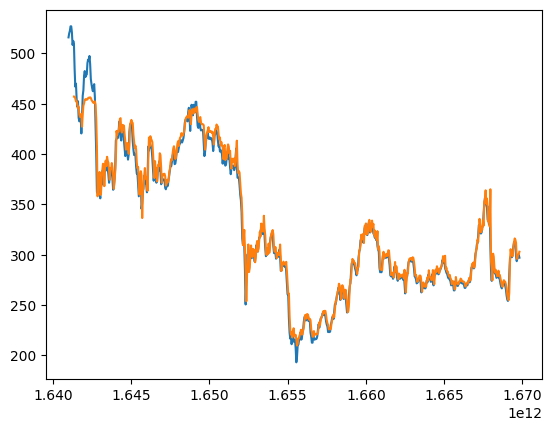

In [209]:
y_pred = mamfmodel.predict(x_series_def)
x_plot = x[8:]
print(x_plot.shape, y_pred.shape)
plt.plot(x,y)
plt.plot(x_plot,y_pred)
plt.show()